In [ ]:
!pip install -q pandas matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cold Storage

In [ ]:
storage_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/Meat_Stats_Cold_Storage.csv"
# Reading the file
with open(storage_path, 'r') as file:
    content = file.read()

In [ ]:
storage_df = pd.read_csv(storage_path, parse_dates=['Date'], date_format='%b-%Y') # Use date_format instead of date_parser
storage_df.sort_values(by='Date', inplace=True)

In [ ]:
print(storage_df.head())
print(storage_df.info())

           Date  Year  Month            Unit           Animal  Weight  \
1967 1983-01-01  1983      1  Million Pounds  Lamb and Mutton    8.65   
3443 1983-01-01  1983      1  Million Pounds           Turkey  203.91   
2951 1983-01-01  1983      1  Million Pounds    Other Chicken   18.00   
2459 1983-01-01  1983      1  Million Pounds          Broiler     NaN   
1475 1983-01-01  1983      1  Million Pounds             Pork  219.02   

     Type_Of_Meat  
1967     Red Meat  
3443      Poultry  
2951      Poultry  
2459      Poultry  
1475     Red Meat  
<class 'pandas.core.frame.DataFrame'>
Index: 3936 entries, 1967 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3936 non-null   datetime64[ns]
 1   Year          3936 non-null   int64         
 2   Month         3936 non-null   int64         
 3   Unit          3936 non-null   object        
 4   Animal        3936 non-null   objec

In [ ]:
# df['Commodity'].fillna('Corn', inplace=True)
grouped = storage_df.groupby('Animal')

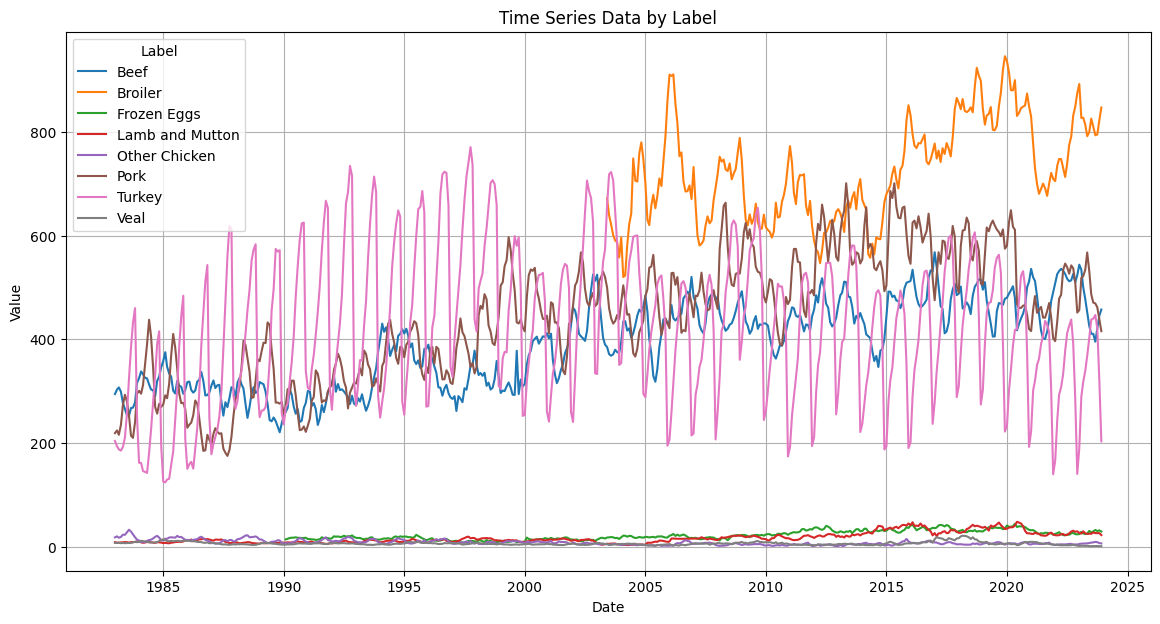

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 7))

for label, group in grouped:
    plt.plot(group['Date'], group['Weight'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Meat Production


In [ ]:
production_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/Meat_Stats_Meat_Production.csv"
# Reading the file
with open(production_path, 'r') as file:
    content = file.read()

In [ ]:
production_df = pd.read_csv(production_path, parse_dates=['Date'], date_format='%b-%Y') # Use '%d' for day

In [ ]:
print(production_df.head())
print(production_df.info())

        Date  Year  Month            Unit Production Animal  \
0 2023-12-01  2023     12  Million Pounds   2,189.80   Beef   
1 2023-11-01  2023     11  Million Pounds   2,280.90   Beef   
2 2023-10-01  2023     10  Million Pounds   2,340.90   Beef   
3 2023-09-01  2023      9  Million Pounds   2,149.40   Beef   
4 2023-08-01  2023      8  Million Pounds   2,363.50   Beef   

  Commercial or Federally Inspected Type of Meat  
0                        Commercial     Red Meat  
1                        Commercial     Red Meat  
2                        Commercial     Red Meat  
3                        Commercial     Red Meat  
4                        Commercial     Red Meat  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13595 entries, 0 to 13594
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               13595 non-null  datetime6

In [ ]:
grouped = production_df.groupby(['Animal', 'Commercial or Federally Inspected'])

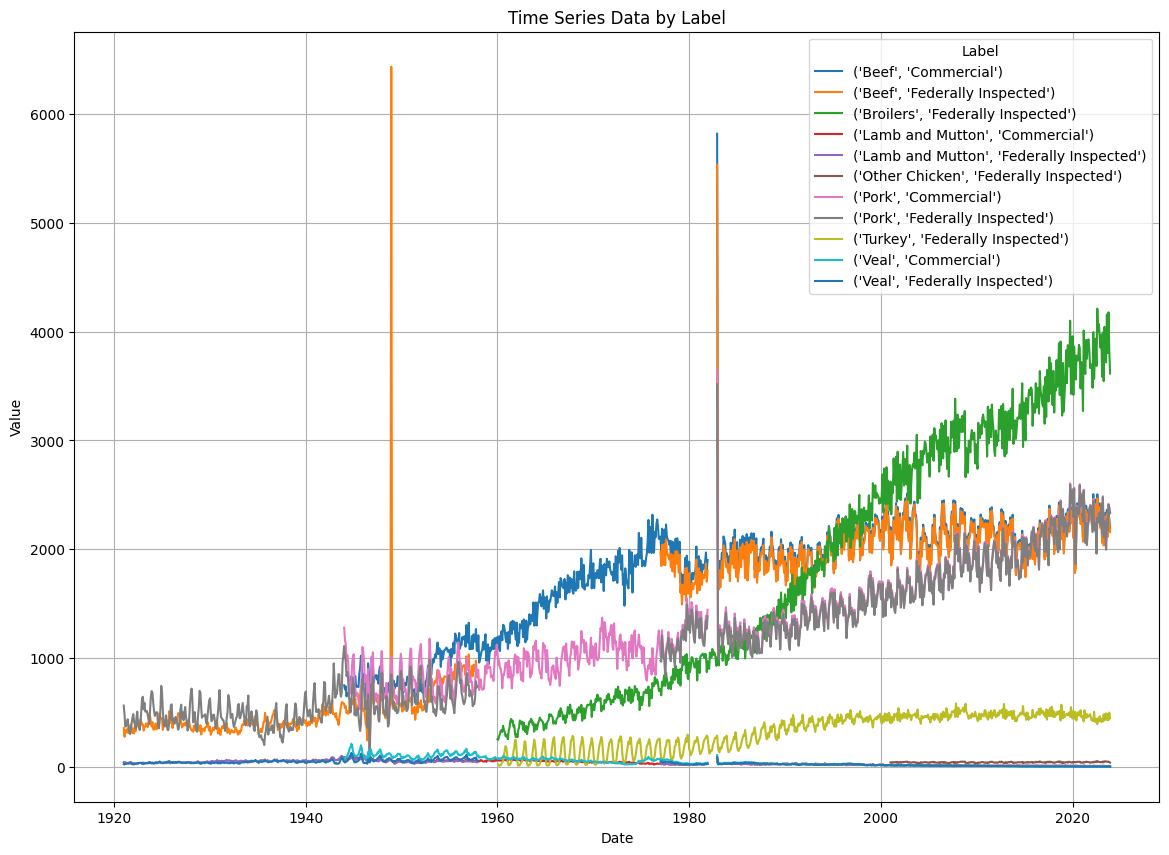

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 10))

for label, group in grouped:
    group = group.sort_values(by='Date')  # Sort by 'Date'
    group['Production'] = group['Production'].str.replace(',', '').astype(float)  # Remove commas and convert to float
    plt.plot(group['Date'], group['Production'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [ ]:
grouped = production_df.groupby('Animal')

In [ ]:
print(grouped.head())

            Date  Year  Month            Unit Production           Animal  \
0     2023-12-01  2023     12  Million Pounds   2,189.80             Beef   
1     2023-11-01  2023     11  Million Pounds   2,280.90             Beef   
2     2023-10-01  2023     10  Million Pounds   2,340.90             Beef   
3     2023-09-01  2023      9  Million Pounds   2,149.40             Beef   
4     2023-08-01  2023      8  Million Pounds   2,363.50             Beef   
1236  2023-12-01  2023     12  Million Pounds        3.9             Veal   
1237  2023-11-01  2023     11  Million Pounds        4.3             Veal   
1238  2023-10-01  2023     10  Million Pounds        4.2             Veal   
1239  2023-09-01  2023      9  Million Pounds        3.6             Veal   
1240  2023-08-01  2023      8  Million Pounds        4.2             Veal   
2472  2023-12-01  2023     12  Million Pounds   2,342.00             Pork   
2473  2023-11-01  2023     11  Million Pounds   2,388.20             Pork   

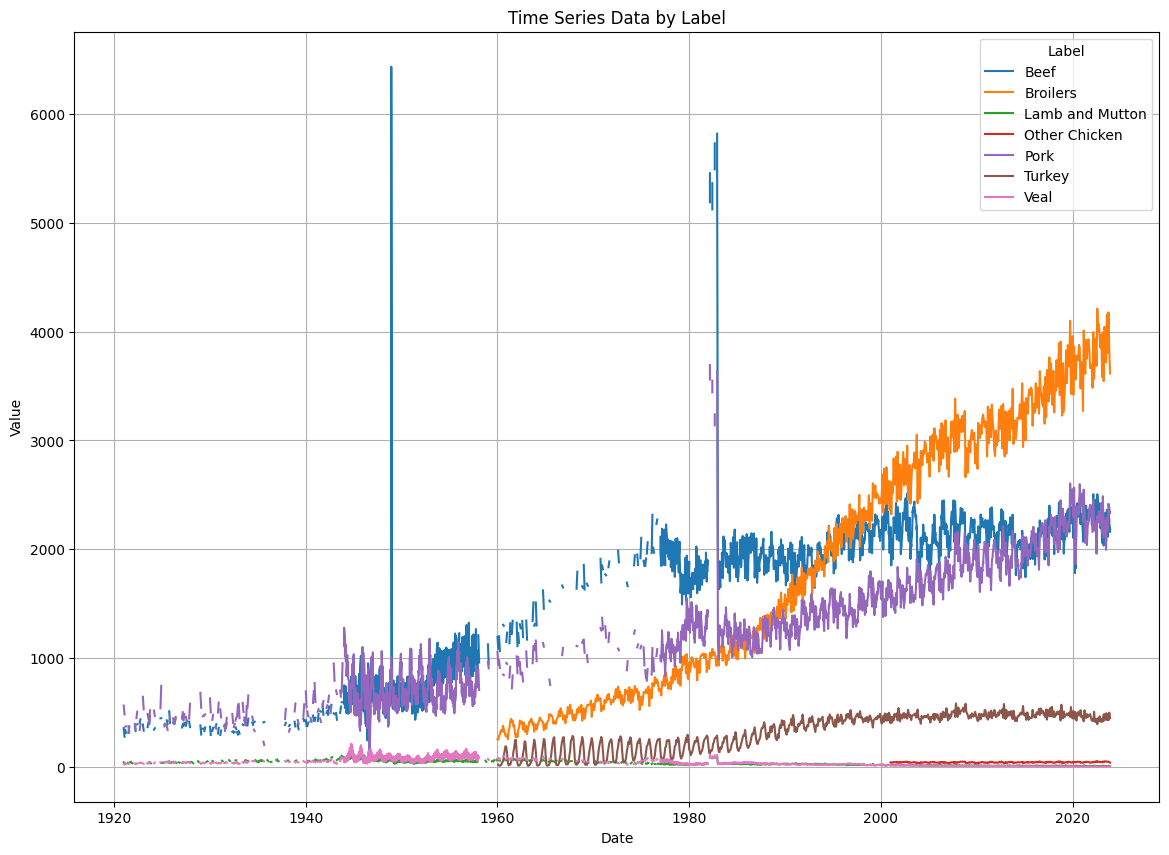

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 10))

for label, group in grouped:
    group = group.sort_values(by='Date')  # Sort by 'Date'
    group['Production'] = group['Production'].str.replace(',', '').astype(float)  # Remove commas and convert to float
    plt.plot(group['Date'], group['Production'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Slaughter Counts

In [ ]:
slaughter_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/Meat_Stats_Slaughter_Counts.csv"
# Reading the file
with open(slaughter_path, 'r') as file:
    content = file.read()

In [ ]:
slaughter_df = pd.read_csv(slaughter_path, parse_dates=['Date'], date_format='%b-%Y')
slaughter_df.sort_values(by='Date', inplace=True)

In [ ]:
print(slaughter_df.head())
print(slaughter_df.info())

            Date  Year  Month        Unit             Animal      Count  \
15282 1982-12-01  1982     12  1,000 Head            Turkeys  11,725.00   
10352 1982-12-01  1982     12  1,000 Head             Calves      725.8   
4436  1982-12-01  1982     12  1,000 Head  Barrows and Gilts  19,582.50   
10845 1982-12-01  1982     12  1,000 Head               Hogs  20,068.20   
11338 1982-12-01  1982     12  1,000 Head  Barrows and Gilts  18,872.00   

      Commercial_Or_Federally_Inspected Type_Of_Meat  
15282               Federally Inspected      Poultry  
10352               Federally Inspected     Red Meat  
4436                         Commercial     Red Meat  
10845               Federally Inspected     Red Meat  
11338               Federally Inspected     Red Meat  
<class 'pandas.core.frame.DataFrame'>
Index: 15283 entries, 15282 to 0
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             -----

In [ ]:
grouped = slaughter_df.groupby(['Animal', 'Commercial_Or_Federally_Inspected'])

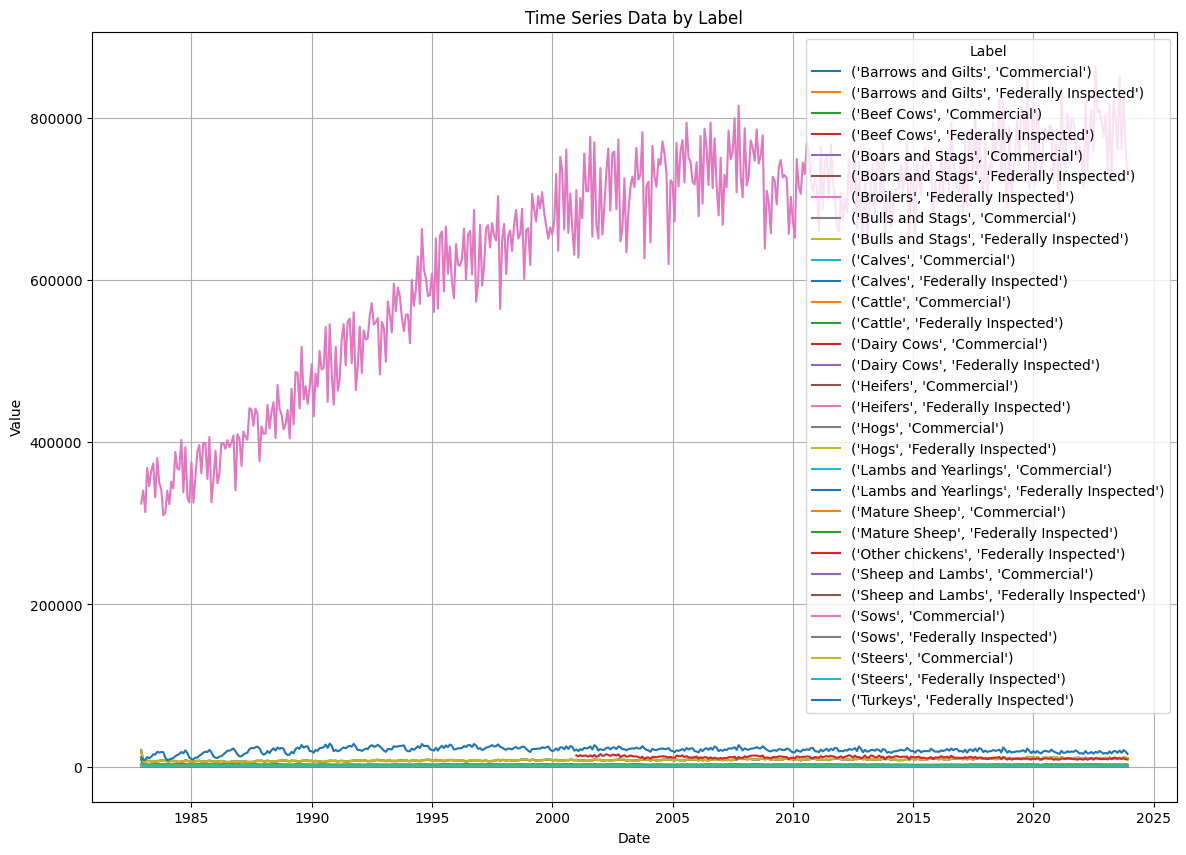

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 10))

for label, group in grouped:
    group.sort_values(by='Date', inplace=True)  # Sort by 'Date'
    group['Count'] = group['Count'].str.replace(',', '').astype(float)
    plt.plot(group['Date'], group['Count'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

In [ ]:
grouped = slaughter_df.groupby('Animal')

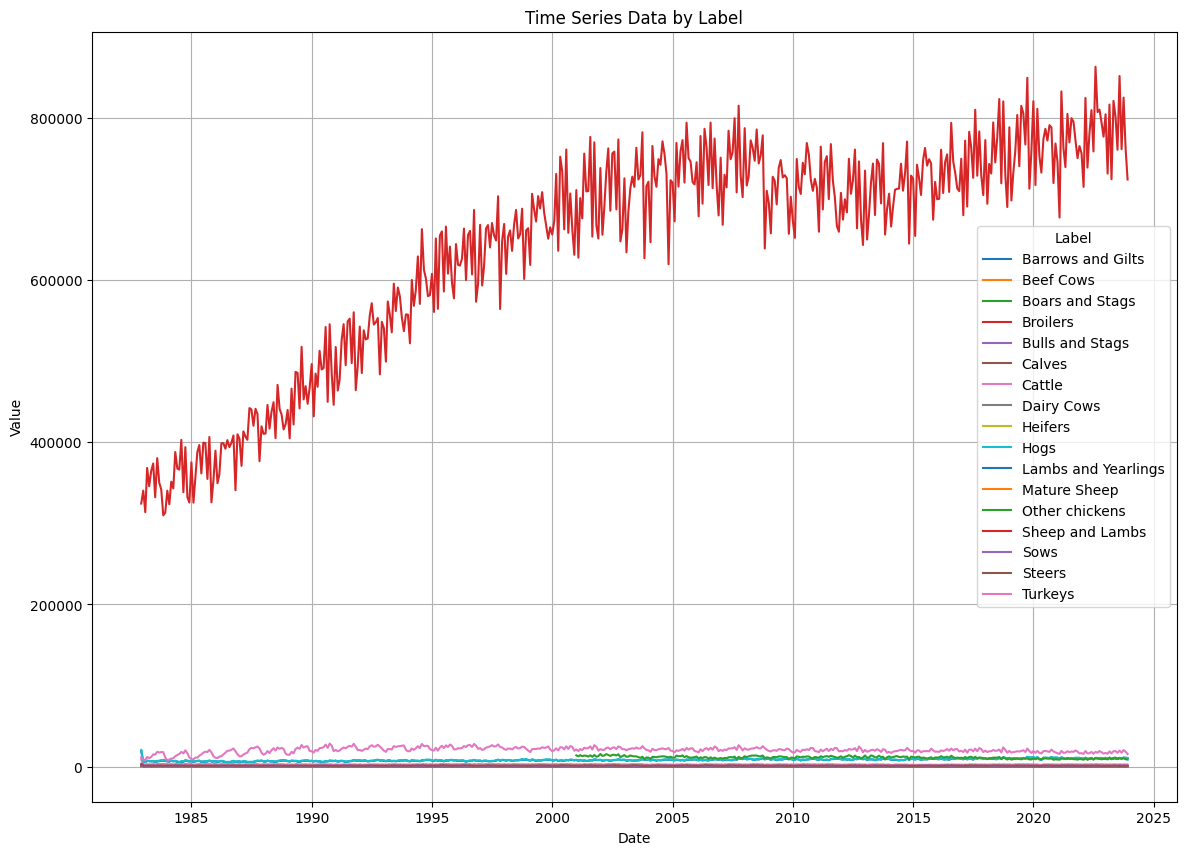

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 10))

for label, group in grouped:
    group.sort_values(by='Date', inplace=True)  # Sort by 'Date'
    group['Count'] = group['Count'].str.replace(',', '').astype(float)
    plt.plot(group['Date'], group['Count'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Slaughter Weights

In [ ]:
weight_path = "/content/drive/MyDrive/Research @ CMU/Citadel Datathon/Datathon Data/Meat_Stats_Slaughter_Weights.csv"
# Reading the file
with open(weight_path, 'r') as file:
    content = file.read()

In [ ]:
weight_df = pd.read_csv(weight_path, parse_dates=['Date'], date_format='%b-%Y')
weight_df.sort_values(by='Date', inplace=True)

In [ ]:
print(weight_df.head())
print(weight_df.info())

           Date  Year  Month                      Unit           Animal  \
9347 1983-01-01  1983      1  Average Weight in Pounds  Sheep and Lambs   
4427 1983-01-01  1983      1  Average Weight in Pounds         Broilers   
3443 1983-01-01  1983      1  Average Weight in Pounds             Hogs   
5903 1983-01-01  1983      1  Average Weight in Pounds           Cattle   
4919 1983-01-01  1983      1  Average Weight in Pounds   Other Chickens   

     Weight Commercial_Or_Federally_Inspected Live_Or_Dressed Type_Of_Meat  
9347     57               Federally Inspected         Dressed     Red Meat  
4427    4.1               Federally Inspected            Live      Poultry  
3443    244               Federally Inspected            Live     Red Meat  
5903    637               Federally Inspected         Dressed     Red Meat  
4919    4.4               Federally Inspected            Live      Poultry  
<class 'pandas.core.frame.DataFrame'>
Index: 9348 entries, 9347 to 0
Data columns (tota

In [ ]:
grouped = weight_df.groupby(['Animal', 'Live_Or_Dressed'])

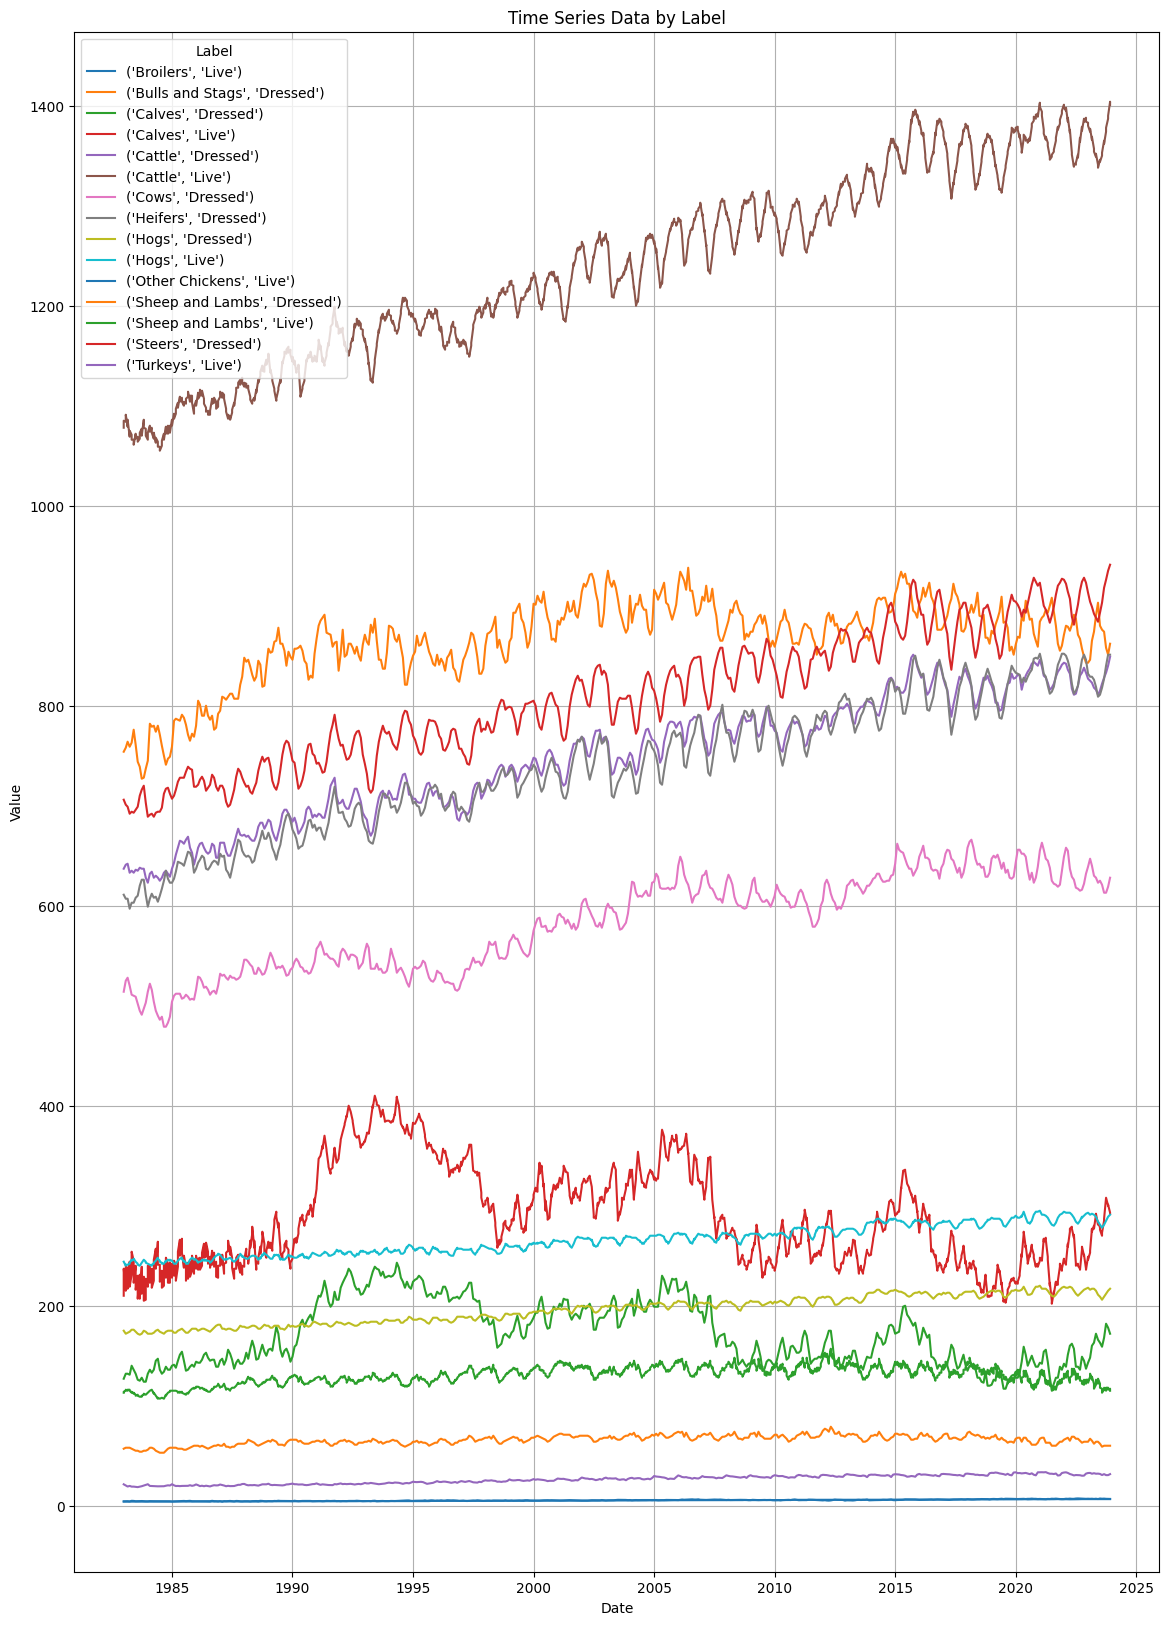

In [ ]:
import matplotlib.pyplot as plt

# Create a plot for each label
plt.figure(figsize=(14, 20))

for label, group in grouped:
    group.sort_values(by='Date', inplace=True)  # Sort by 'Date'
    group['Weight'] = group['Weight'].str.replace(',', '').astype(float)
    plt.plot(group['Date'], group['Weight'], label=label)

plt.title('Time Series Data by Label')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Label')
plt.grid(True)
plt.show()